In [1]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def rsrs_beta_weighted_factor(df, window_N=16):
    """高效计算加权回归的RSRS指标"""
    low = df['low']
    high = df['high']
    n = len(df)
    beta = np.full(n, np.nan)
    
    # 预计算权重
    weights = np.linspace(1, window_N, window_N)
    weights /= weights.sum()
    
    # 使用更安全的方式计算加权回归
    for i in range(window_N-1, n):
        # 获取窗口数据
        window_low = low.iloc[i-window_N+1:i+1].values
        window_high = high.iloc[i-window_N+1:i+1].values
        
        # 计算加权均值
        w_low_mean = np.dot(window_low, weights)
        w_high_mean = np.dot(window_high, weights)
        
        # 计算加权协方差和方差
        w_cov = np.dot(weights, (window_low - w_low_mean) * (window_high - w_high_mean))
        w_low_var = np.dot(weights, (window_low - w_low_mean)**2)
        
        # 计算beta
        if w_low_var < 1e-5:
            beta[i] = 0
        else:
            beta[i] = w_cov / w_low_var
    
    return pd.Series(beta, index=df.index).ffill().fillna(0)

In [5]:
evaluator.set_factor(
    factor_data_or_func=rsrs_beta_weighted_factor,
    factor_name='rsrs_beta_weighted_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.005886
   Rank_IC (Spearman): -0.033115
📊 信息比率:
   IR: -0.125192
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130650
   因子列: rsrs_beta_weighted_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


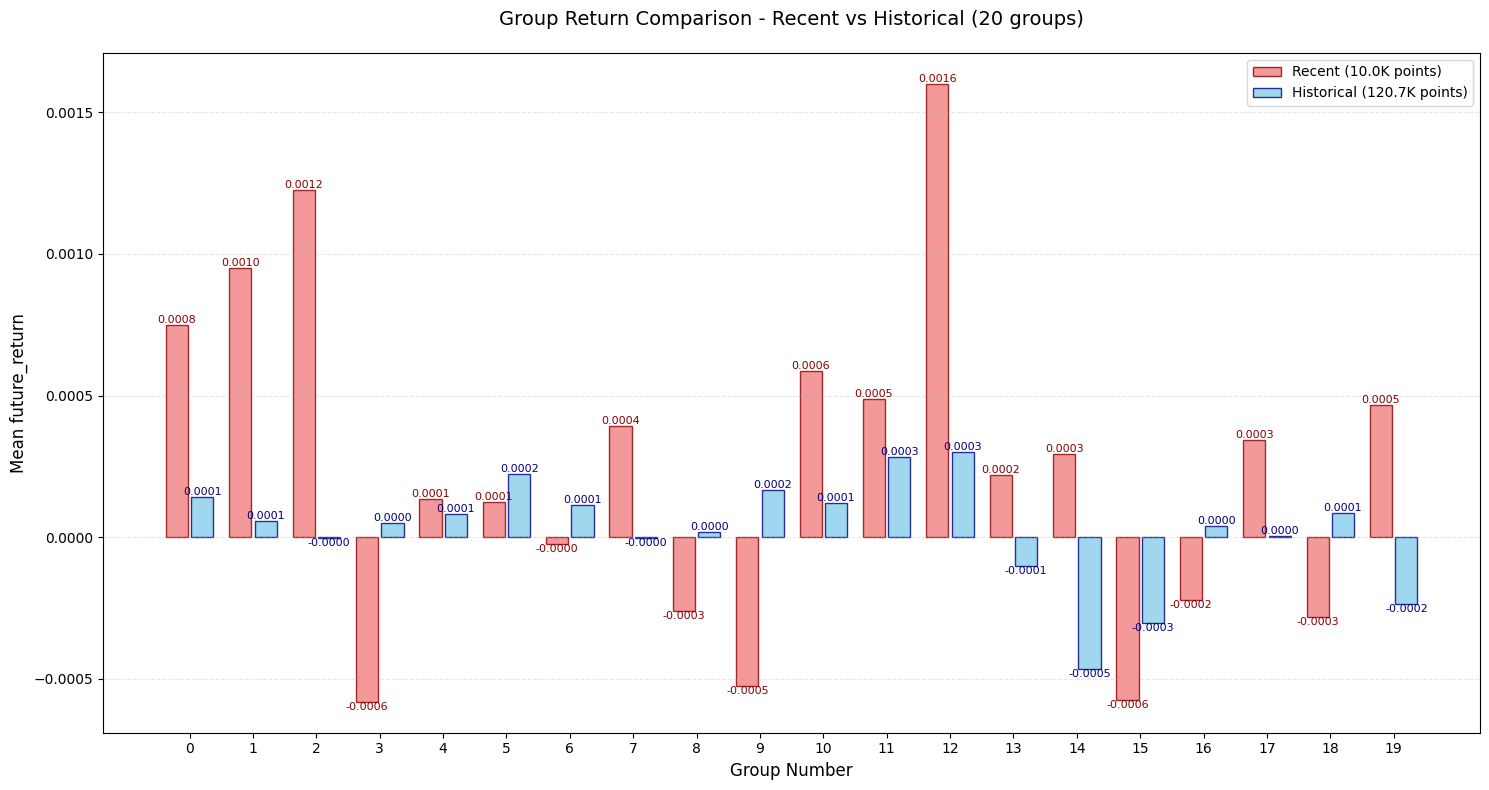

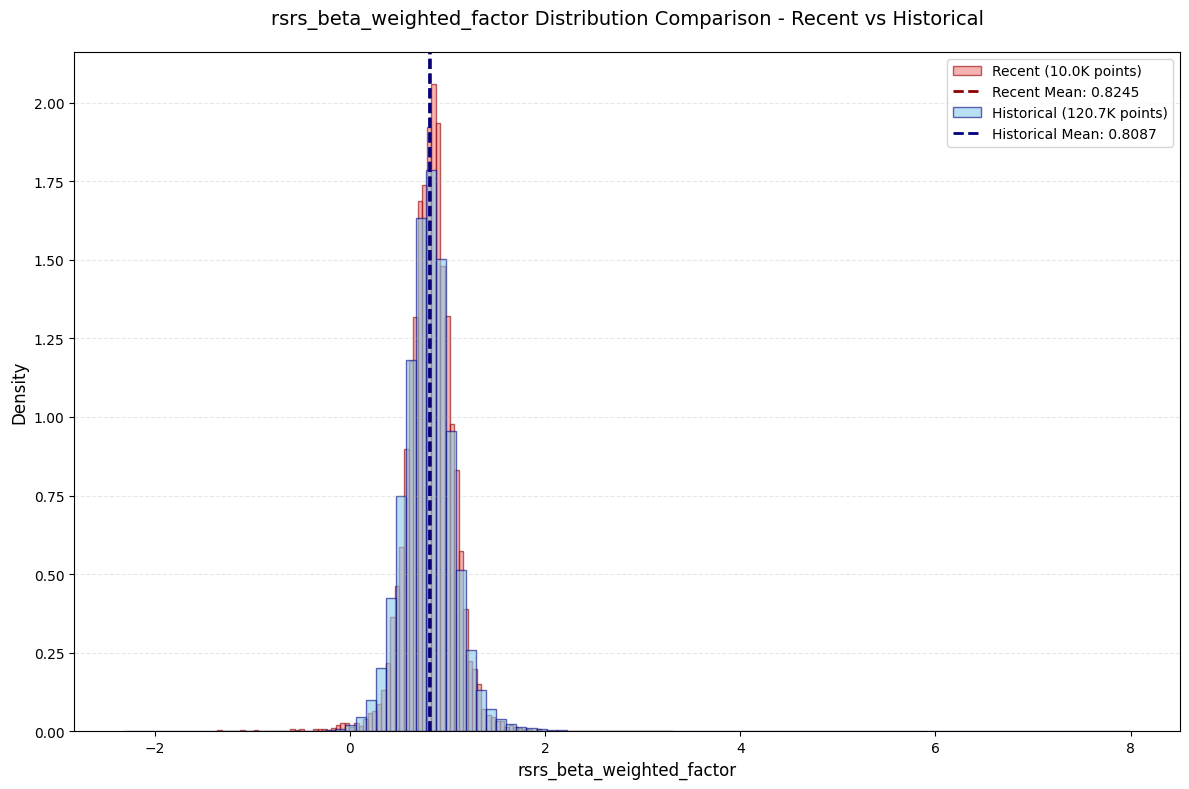

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)